## torch 고차 미분 계산과 원리

In [1]:
from mytorch.class_mytorch import Mytorch
import numpy as np

# Example usage
x = Mytorch(np.array(2.0))  # Changed to My
x

mytorch(2.0)

In [3]:
!pip install graphviz

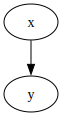

In [4]:
from graphviz import Digraph

# 그래프 생성
dot = Digraph()

# 노드 추가
dot.node('x', 'x')  # 'x'라는 노드를 추가
dot.node('y', 'y')  # 'y'라는 노드를 추가

# 엣지 추가 (연결선)
dot.edges(['xy'])  # x에서 y로 가는 엣지를 추가

# 그래프 출력
dot.render('graph', format='png', cleanup=True)  # 'graph.png'로 저장
dot  # Jupyter Notebook에서 그래프를 표시


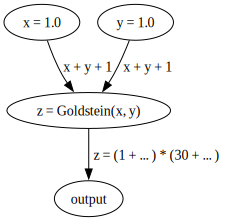

In [5]:
import numpy as np
from graphviz import Digraph

# Goldstein 함수 정의
def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

# 그래프 시각화를 위한 Graphviz 객체 생성
dot = Digraph()

# 노드 추가
dot.node('x', 'x = 1.0')
dot.node('y', 'y = 1.0')
dot.node('z', 'z = Goldstein(x, y)')

# 엣지 추가 (연결선)
dot.edge('x', 'z', label='x + y + 1')
dot.edge('y', 'z', label='x + y + 1')
dot.edge('z', 'output', label='z = (1 + ... ) * (30 + ... )')

# 그래프 출력
dot.render('goldstein_graph', format='png', cleanup=True)  # 'goldstein_graph.png'로 저장
dot  # Jupyter Notebook에서 그래프 표시


In [3]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))

In [2]:
import numpy as np
from mytorch.utils import get_dot_graph
from mytorch.class_mytorch import Mytorch,setup_Mytorch #! __init__ 정의가 안되어 있을 경우

setup_Mytorch()

x0,x1=Mytorch(np.array([2.0]),"x0"),Mytorch(np.array([5.0]),"x1")
y=x0+x1
y.name='y'

txt=get_dot_graph(y,verbose=False)

print(txt)

with open('sample.dot','w') as o :
    o.write(txt)

ImportError: cannot import name 'setup_Mytorch' from 'mytorch.class_mytorch' (c:\study\extra_part_00_pytorch\mytorch\class_mytorch.py)

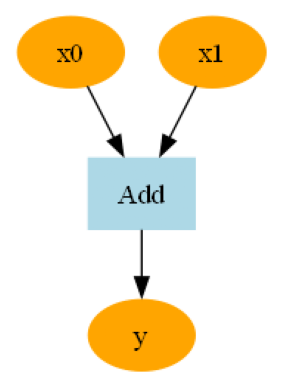

In [ ]:
import matplotlib.pyplot as plt
import graphviz


from mytorch import Mytorch,setup_mytorch #! __init__ 정의가 된경우 바로 사용가능

setup_mytorch()

# sample.dot 파일을 읽어서 그래프를 생성합니다.
with open('sample.dot') as f:
    dot_graph = f.read()

# Graphviz를 사용하여 DOT 언어로 표현된 그래프를 시각화합니다.
graph = graphviz.Source(dot_graph)
graph.render('sample', format='png', cleanup=True)  # sample.png로 저장합니다.

# 이미지를 표시합니다.
plt.imshow(plt.imread('sample.png'))
plt.axis('off')  # 축을 제거합니다.
plt.show()

### Goldestein-Price function vizualization

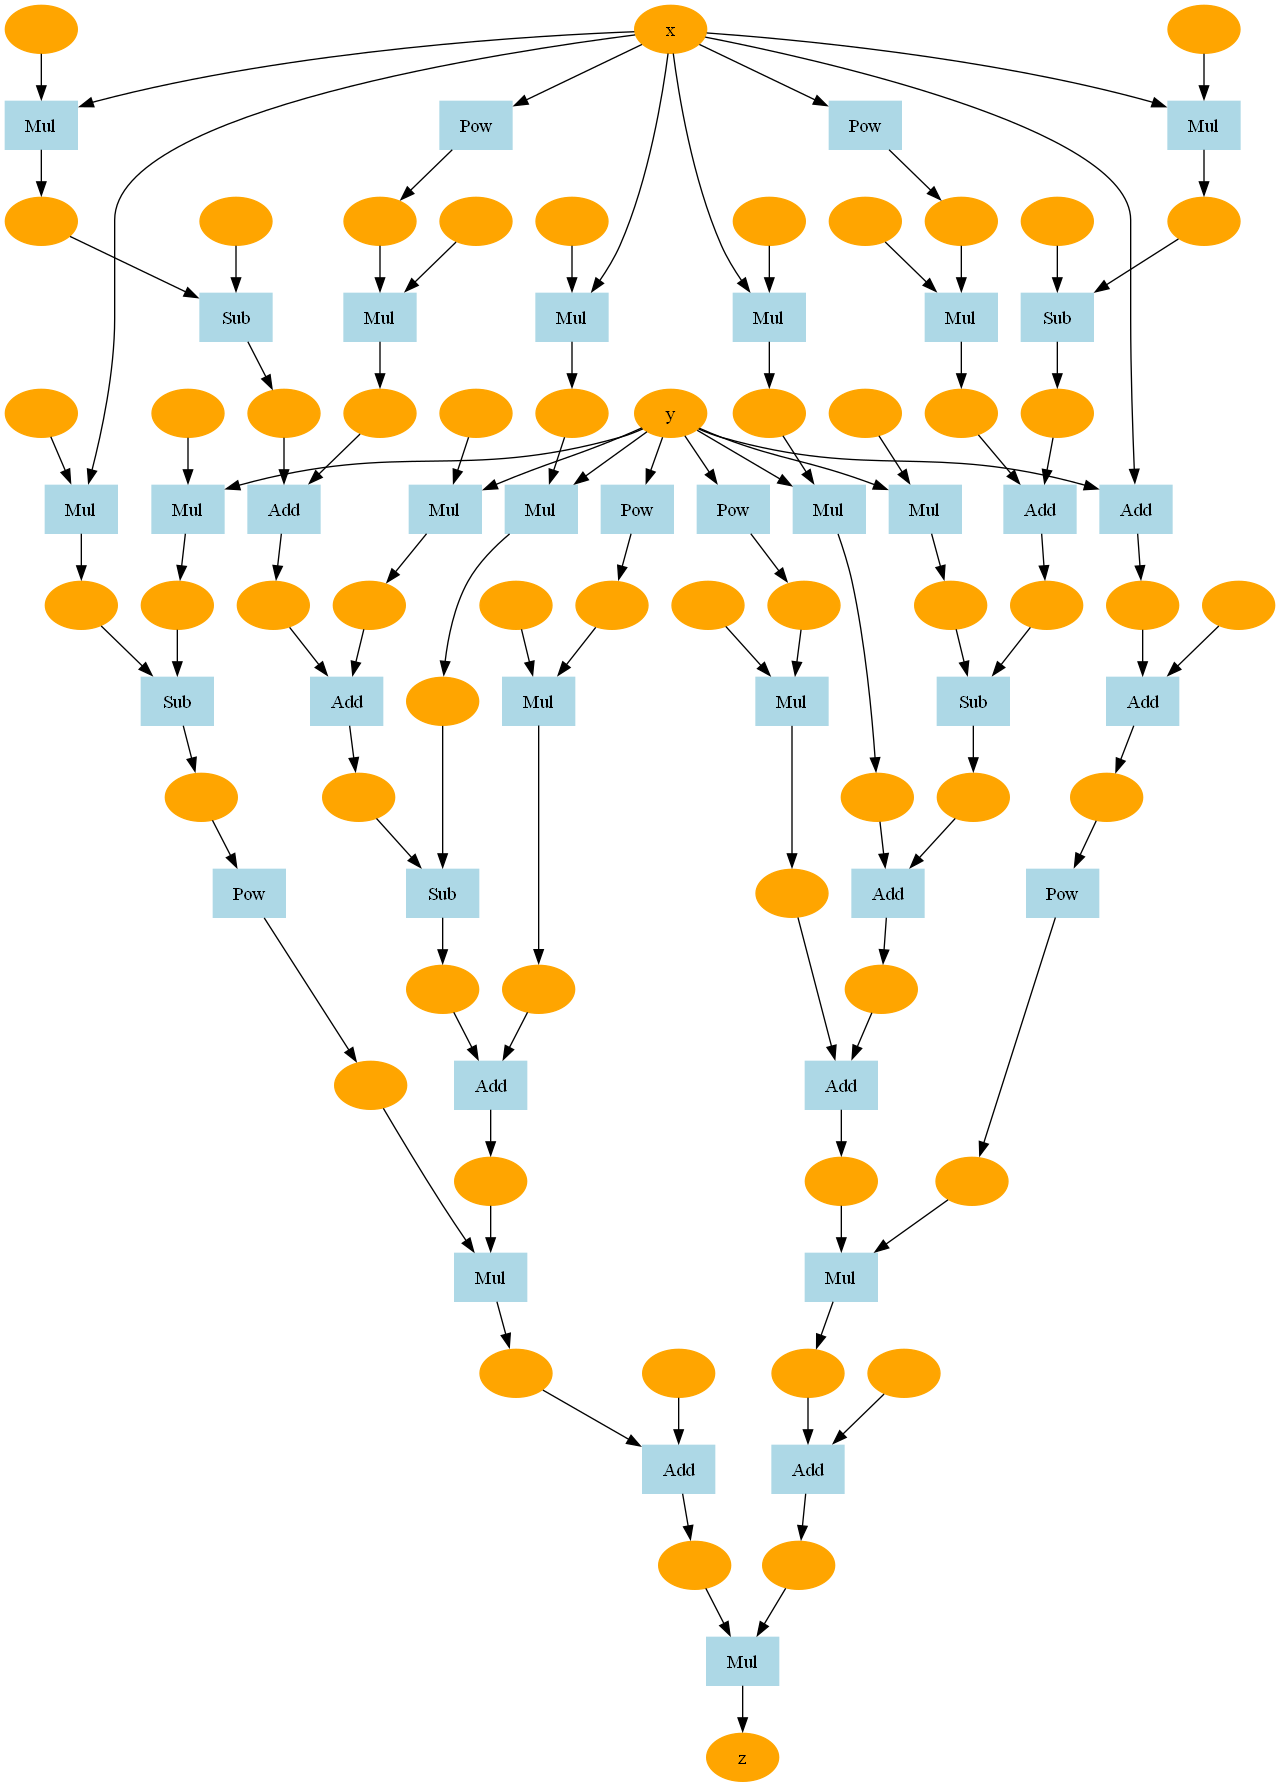

In [4]:
'''
Need the dot binary from the graphviz package (www.graphviz.org).
'''
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import numpy as np

from mytorch.utils import plot_dot_graph


def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z


x = Mytorch(np.array(1.0))
y = Mytorch(np.array(1.0))
z = goldstein(x, y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')

## 테일러 급수 미분


$$
y = \sin(x)
$$

2. 함수의 미분은 

$$
\frac{dy}{dx} = \cos(x)
$$

In [6]:
from mytorch import Mytorch,Function
import math

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx


def sin(x):
    return Sin()(x)


x = Mytorch(np.array(np.pi / 4))
y = sin(x)
y.backward()
print('--- original sin ---')
print(y.data)
print(x.grad)


def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


x = Mytorch(np.array(np.pi / 4))
y = my_sin(x)  # , threshold=1e-150)
y.backward()
print('--- approximate sin ---')
print(y.data)
print(x.grad)

--- original sin ---
0.7071067811865476
0.7071067811865476
--- approximate sin ---
0.7071064695751781
0.7071032148228457


## 테일러 급수 (Taylor Series)

테일러 급수는 어떤 함수 $ f(x) $를 특정 점 $ a $에서 다항식의 무한급수로 표현하는 방법입니다. $ f(x) $가 $ n $차 미분 가능할 때, $ f(x) $의 테일러 급수는 다음과 같이 정의됩니다:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots
$$

즉,

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n
$$

여기서:
- $ f^{(n)}(a) $는 $ f(x) $의 $ n $차 미분을 $ x = a $에서 평가한 값입니다.
- $ n! $는 $ n $의 계승을 나타냅니다.

### 예시

함수 $ e^x $의 테일러 급수는 $ a = 0 $에서 다음과 같이 표현됩니다:

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$


In [7]:
import math

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx


def sin(x):
    return Sin()(x)


x = Mytorch(np.array(np.pi / 4))
y = sin(x)
y.backward()
print('--- original sin ---')
print(y.data)
print(x.grad)


def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


x = Mytorch(np.array(np.pi / 4))
y = my_sin(x)  # , threshold=1e-150)
y.backward()
print('--- approximate sin ---')
print(y.data)
print(x.grad)

--- original sin ---
0.7071067811865476
0.7071067811865476
--- approximate sin ---
0.7071064695751781
0.7071032148228457


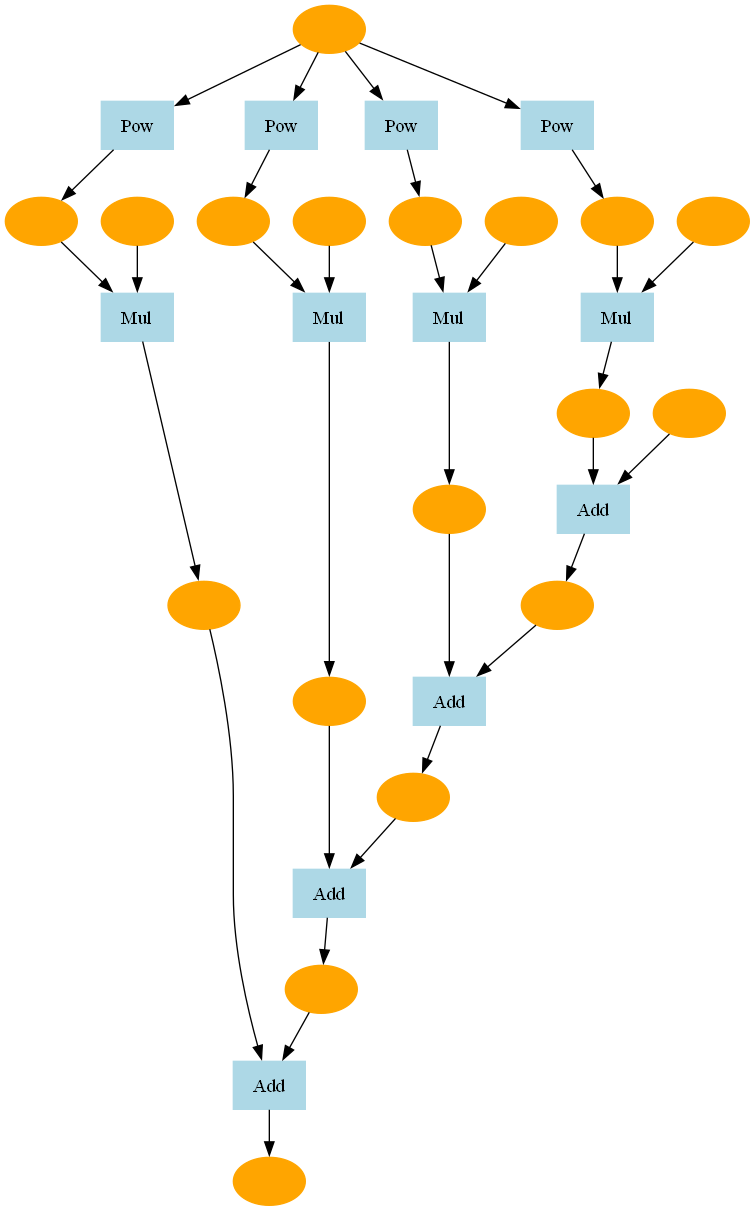

In [8]:
plot_dot_graph(y, verbose=False, to_file='테일러급수.png')

### 함수의 최적화

## 로젠브록 함수 (Rosenbrock Function)

로젠브록 함수는 다음과 같이 정의됩니다:

$$
f(x, y) = (a - x)^2 + b(y - x^2)^2
$$

여기서:
- $( a $)와 $( b $)는 상수입니다. 일반적으로 $( a = 1 $)과 $( b = 100 $)을 사용합니다.
- 이 함수는 2차원 공간에서 최소값을 갖고 있으며, 최소값은 $( (x, y) = (a, a^2) $)에 위치합니다.

특히, 기본 로젠브록 함수는 다음과 같습니다:

$$
f(x, y) = (1 - x)^2 + 100(y - x^2)^2
$$

이 함수의 최소값은 $( f(1, 1) = 0 $)입니다.

### 그래프

로젠브록 함수의 3D 그래프는 다음과 같이 생겼습니다:

- 함수는 (1, 1)에서 최소값을 가지며, 이 지점은 함수의 "바닥"에 해당합니다.
- 함수의 값은 (1, 1)에서 멀어질수록 빠르게 증가합니다.




$y=100(x_1-x_0^2)^2+(1-x_0)^2$

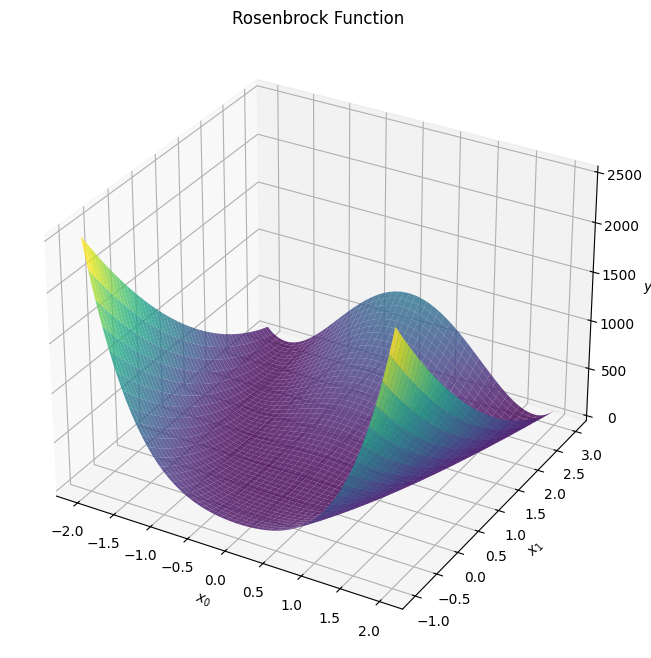

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 로젠브록 함수 정의
def rosenbrock(x0, x1):
    return 100 * (x1 - x0**2)**2 + (1 - x0)**2

# x0, x1의 범위 설정
x0 = np.linspace(-2, 2, 400)
x1 = np.linspace(-1, 3, 400)
x0, x1 = np.meshgrid(x0, x1)

# 함수 값 계산
y = rosenbrock(x0, x1)

# 3D 그래프 설정
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 그래프 그리기
ax.plot_surface(x0, x1, y, cmap='viridis', alpha=0.8)

# 축 레이블 설정
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$y$')
ax.set_title('Rosenbrock Function')

plt.show()


## 기울기와 경사하강법

### 기울기에 대한 설명

1. **기울기**: 
   - 기울기가 2라는 것은, 그 점에서 $y$값이 $x$값이 1만큼 증가할 때 $y$값이 2만큼 증가한다는 의미입니다. 
   - 따라서, $x$에서의 기울기가 양수인 경우, 그 점에서 함수는 증가하고 있습니다. 기울기가 클수록 더 빠르게 증가하게 됩니다.

2. **기울기 값이 100인 점**: 
   - $x_2$에서 기울기가 100이라는 것은, $x$값이 1만큼 증가할 때 $y$값이 100만큼 증가한다는 것입니다. 
   - 이 또한 함수가 매우 빠르게 증가하고 있다는 것을 나타냅니다.

### 경사하강법

- **경사하강법**: 
   - 이는 기울기를 이용하여 최적화를 수행하는 방법입니다. 기울기가 양수인 방향으로 이동하면 $y$ 값이 증가하므로, 최적화 문제에서는 보통 기울기를 반대로 향하게 이동합니다. 
   - 즉, 경사하강법은 다음과 같은 공식을 사용합니다:

   $$
   x' = x - \eta \cdot \nabla f(x)
   $$

   여기서:
   - $x'$는 다음 단계의 변수 값,
   - $\eta$는 학습률(learning rate),
   - $\nabla f(x)$는 함수 $f$의 기울기입니다.

이렇게 함으로써 함수의 값을 최대한 줄이는 방향으로 이동하게 됩니다. 

### 결론

- 주어진 두 점 $x$와 $x_2$에서의 기울기 값이 각각 2와 100이라는 것은, 해당 지점에서 $y$값을 최대한 증가시키는 방향을 나타냅니다.
- 경사하강법은 이러한 기울기를 반대로 사용하여 함수의 값을 줄이는 방향으로 이동합니다.


In [14]:
import weakref
import numpy as np
import contextlib
import mytorch

class Config:
    """
    글로벌 설정을 관리하는 클래스입니다.

    속성:
        enable_backprop (bool): True일 경우 역전파를 활성화합니다.
    """
    enable_backprop: bool = True


@contextlib.contextmanager
def using_config(name: str, value: bool):
    """
    특정 설정 값을 일시적으로 변경하는 컨텍스트 매니저입니다.

    매개변수:
        name (str): 변경할 설정의 이름.
        value (bool): 설정할 값.

    사용 예시:
        >>> with using_config('enable_backprop', False):
        ...     # 임시로 역전파 비활성화
    """
    old_value = getattr(Config, name)
    setattr(Config, name, value)
    try:
        yield
    finally:
        setattr(Config, name, old_value)


def no_grad():
    """
    역전파를 비활성화하는 컨텍스트 매니저입니다.

    반환값:
        contextlib.ContextDecorator: 역전파를 비활성화하는 컨텍스트 매니저.

    사용 예시:
        >>> with no_grad():
        ...     # 역전파 없이 연산 수행
    """
    return using_config('enable_backprop', False)

def as_mytorch(obj):
    if isinstance(obj, Mytorch):  # Changed to Mytorch
        return obj
    return Mytorch(obj)


def as_array(x):
    if np.isscalar(x):
        return np.array(x)
    return x

class Mytorch:
    """
    Mytorch 프레임워크의 핵심 데이터 클래스입니다.

    매개변수:
        data (np.ndarray): 래핑할 데이터.
        name (str, 선택적): 텐서의 이름.

    속성:
        data (np.ndarray): 래핑된 데이터.
        name (str): 텐서의 이름.
        grad (np.ndarray 또는 None): 텐서의 기울기(gradient).
        creator (Function 또는 None): 이 텐서를 생성한 함수.
        generation (int): 연산 그래프에서 텐서의 세대 정보.

    사용 예시:
        >>> x = Mytorch(np.array([1.0, 2.0, 3.0]), name='x')
        >>> print(x)
        mytorch([1. 2. 3.])
    """
    __array_priority__ = 200

    def __init__(self, data: np.ndarray, name: str = None):
        if data is not None and not isinstance(data, np.ndarray):
            raise TypeError(f'{type(data)}는 지원하지 않는 타입입니다.')
        self.data = data
        self.name = name
        self.grad = None
        self.creator = None
        self.generation = 0

    @property
    def shape(self) -> tuple:
        """
        텐서의 모양(shape)을 반환합니다.

        반환값:
            tuple: 텐서의 모양.

        사용 예시:
            >>> x = Mytorch(np.array([[1, 2], [3, 4]]))
            >>> x.shape
            (2, 2)
        """
        return self.data.shape

    @property
    def ndim(self) -> int:
        """
        텐서의 차원 수를 반환합니다.

        반환값:
            int: 텐서의 차원 수.

        사용 예시:
            >>> x = Mytorch(np.array([[1, 2], [3, 4]]))
            >>> x.ndim
            2
        """
        return self.data.ndim

    @property
    def size(self) -> int:
        """
        텐서의 총 요소 수를 반환합니다.

        반환값:
            int: 텐서의 총 요소 수.

        사용 예시:
            >>> x = Mytorch(np.array([[1, 2], [3, 4]]))
            >>> x.size
            4
        """
        return self.data.size

    @property
    def dtype(self) -> np.dtype:
        """
        텐서 데이터의 데이터 타입을 반환합니다.

        반환값:
            np.dtype: 데이터 타입.

        사용 예시:
            >>> x = Mytorch(np.array([1.0, 2.0, 3.0]))
            >>> x.dtype
            dtype('float64')
        """
        return self.data.dtype

    def __len__(self) -> int:
        """
        텐서의 첫 번째 차원의 크기를 반환합니다.

        반환값:
            int: 텐서의 첫 번째 차원의 크기.

        사용 예시:
            >>> x = Mytorch(np.array([[1, 2], [3, 4]]))
            >>> len(x)
            2
        """
        return len(self.data)

    def __repr__(self) -> str:
        """
        텐서의 문자열 표현을 반환합니다.

        반환값:
            str: 텐서의 문자열 표현.

        사용 예시:
            >>> x = Mytorch(np.array([1, 2, 3]))
            >>> print(x)
            mytorch([1 2 3])
        """
        if self.data is None:
            return 'mytorch(None)'
        p = str(self.data).replace('\n', '\n' + ' ' * 9)
        return f'mytorch({p})'

    def set_creator(self, func: "Function"):
        """
        이 텐서를 생성한 함수를 설정합니다.

        매개변수:
            func (Function): 생성한 함수.

        사용 예시:
            >>> x = Mytorch(np.array([1.0]))
            >>> f = Function()
            >>> x.set_creator(f)
        """
        self.creator = func
        self.generation = func.generation + 1

    def cleargrad(self):
        """
        텐서의 기울기(gradient)를 초기화합니다.

        사용 예시:
            >>> x = Mytorch(np.array([1.0]))
            >>> x.grad = np.array([0.1])
            >>> x.cleargrad()
            >>> x.grad
            None
        """
        self.grad = None

    def backward(self, retain_grad: bool = False):
        """
        이 텐서로부터 역전파를 수행합니다.

        매개변수:
            retain_grad (bool): 중간 텐서의 기울기를 유지할지 여부.

        사용 예시:
            >>> x = Mytorch(np.array([2.0]))
            >>> y = x ** 2
            >>> y.backward()
            >>> x.grad
            array([4.0])
        """
        if self.grad is None:
            self.grad = np.ones_like(self.data)

        funcs = []
        seen_set = set()

        def add_func(f):
            if f not in seen_set:
                funcs.append(f)
                seen_set.add(f)
                funcs.sort(key=lambda x: x.generation)

        add_func(self.creator)

        while funcs:
            f = funcs.pop()
            gys = [output().grad for output in f.outputs]  # output은 weakref
            gxs = f.backward(*gys)
            if not isinstance(gxs, tuple):
                gxs = (gxs,)

            for x, gx in zip(f.inputs, gxs):
                if x.grad is None:
                    x.grad = gx
                else:
                    x.grad += gx

                if x.creator is not None:
                    add_func(x.creator)

            if not retain_grad:
                for y in f.outputs:
                    y().grad = None  # y는 weakref

class Function:
    """
    Mytorch에서 연산을 정의하는 기본 클래스입니다.

    이 클래스를 상속받아 연산의 `forward`와 `backward` 메서드를 구현해야 합니다.
    """

    def __call__(self, *inputs: Mytorch) -> Mytorch:
        """
        입력 텐서로부터 연산을 수행하고 결과를 반환합니다.

        매개변수:
            *inputs (Mytorch): 입력 텐서들.

        반환값:
            Mytorch: 연산 결과 텐서.

        사용 예시:
            >>> class Square(Function):
            ...     def forward(self, x):
            ...         return x ** 2
            ...
            ...     def backward(self, gy):
            ...         x = self.inputs[0].data
            ...         return gy * 2 * x
            ...
            >>> x = Mytorch(np.array(2.0))
            >>> f = Square()
            >>> y = f(x)
            >>> print(y)
            mytorch(4.0)
        """
        inputs = [as_mytorch(x) for x in inputs]

        xs = [x.data for x in inputs]
        ys = self.forward(*xs)
        if not isinstance(ys, tuple):
            ys = (ys,)
        outputs = [Mytorch(as_array(y)) for y in ys]

        if Config.enable_backprop:
            self.generation = max([x.generation for x in inputs])
            for output in outputs:
                output.set_creator(self)
            self.inputs = inputs
            self.outputs = [weakref.ref(output) for output in outputs]

        return outputs if len(outputs) > 1 else outputs[0]

    def forward(self, *xs: np.ndarray) -> np.ndarray:
        """
        순전파(Forward) 계산을 수행합니다.

        매개변수:
            *xs (np.ndarray): 입력 데이터.

        반환값:
            np.ndarray: 연산 결과.

        사용 예시:
            >>> # 이 메서드는 직접 호출되지 않으며 상속 클래스에서 구현합니다.
        """
        raise NotImplementedError()

    def backward(self, *gys: np.ndarray) -> tuple:
        """
        역전파(Backward) 계산을 수행합니다.

        매개변수:
            *gys (np.ndarray): 출력 기울기.

        반환값:
            tuple: 입력 기울기.

        사용 예시:
            >>> # 이 메서드는 직접 호출되지 않으며 상속 클래스에서 구현합니다.
        """
        raise NotImplementedError()


class Add(Function):
    """
    텐서 덧셈 연산을 정의하는 클래스입니다.
    """

    def forward(self, x0: np.ndarray, x1: np.ndarray) -> np.ndarray:
        """
        덧셈의 순전파를 수행합니다.

        매개변수:
            x0 (np.ndarray): 첫 번째 입력 데이터.
            x1 (np.ndarray): 두 번째 입력 데이터.

        반환값:
            np.ndarray: 두 입력의 합.

        사용 예시:
            >>> x0 = np.array(2.0)
            >>> x1 = np.array(3.0)
            >>> Add().forward(x0, x1)
            array(5.0)
        """
        return x0 + x1

    def backward(self, gy: np.ndarray) -> tuple:
        """
        덧셈의 역전파를 수행합니다.

        매개변수:
            gy (np.ndarray): 출력 기울기.

        반환값:
            tuple: 입력 기울기.

        사용 예시:
            >>> gy = np.array(1.0)
            >>> Add().backward(gy)
            (array(1.0), array(1.0))
        """
        return gy, gy


def add(x0: Mytorch, x1: Mytorch |int |float) -> Mytorch:
    """
    두 텐서를 더합니다.

    매개변수:
        x0 (Mytorch): 첫 번째 입력 텐서.
        x1 (Mytorch | int | float): 두 번째 입력 텐서 또는 숫자.

    반환값:
        Mytorch: 두 입력의 합.

    사용 예시:
        >>> x0 = Mytorch(np.array(2.0))
        >>> x1 = Mytorch(np.array(3.0))
        >>> y = add(x0, x1)
        >>> print(y)
        mytorch(5.0)

        >>> x0 = Mytorch(np.array(2.0))
        >>> x1 = 3  # 숫자형
        >>> y = add(x0, x1)
        >>> print(y)
        mytorch(5.0)
    """
    x1 = as_array(x1)
    return Add()(x0, x1)


class Mul(Function):
    """
    텐서 곱셈 연산을 정의하는 클래스입니다.
    """

    def forward(self, x0: np.ndarray, x1: np.ndarray) -> np.ndarray:
        """
        곱셈의 순전파를 수행합니다.

        매개변수:
            x0 (np.ndarray): 첫 번째 입력 데이터.
            x1 (np.ndarray): 두 번째 입력 데이터.

        반환값:
            np.ndarray: 두 입력의 곱.

        사용 예시:
            >>> x0 = np.array(2.0)
            >>> x1 = np.array(3.0)
            >>> Mul().forward(x0, x1)
            array(6.0)
        """
        return x0 * x1

    def backward(self, gy: np.ndarray) -> tuple:
        """
        곱셈의 역전파를 수행합니다.

        매개변수:
            gy (np.ndarray): 출력 기울기.

        반환값:
            tuple: 입력 기울기.

        사용 예시:
            >>> gy = np.array(1.0)
            >>> x0, x1 = np.array(2.0), np.array(3.0)
            >>> f = Mul()
            >>> f.inputs = [Mytorch(x0), Mytorch(x1)]
            >>> f.backward(gy)
            (array(3.0), array(2.0))
        """
        x0, x1 = self.inputs[0].data, self.inputs[1].data
        return gy * x1, gy * x0


def mul(x0: Mytorch, x1: Mytorch) -> Mytorch:
    """
    두 텐서를 곱합니다.

    매개변수:
        x0 (Mytorch): 첫 번째 입력 텐서.
        x1 (Mytorch): 두 번째 입력 텐서.

    반환값:
        Mytorch: 두 입력의 곱.

    사용 예시:
        >>> x0 = Mytorch(np.array(2.0))
        >>> x1 = Mytorch(np.array(3.0))
        >>> y = mul(x0, x1)
        >>> print(y)
        mytorch(6.0)
    """
    x1 = as_array(x1)
    return Mul()(x0, x1)

class Neg(Function):
    """
    텐서의 음수를 반환하는 연산을 정의하는 클래스입니다.
    """

    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        음수 계산의 순전파를 수행합니다.

        매개변수:
            x (np.ndarray): 입력 데이터.

        반환값:
            np.ndarray: 입력 데이터의 음수.

        사용 예시:
            >>> x = np.array(3.0)
            >>> Neg().forward(x)
            array(-3.0)
        """
        return -x

    def backward(self, gy: np.ndarray) -> np.ndarray:
        """
        음수 계산의 역전파를 수행합니다.

        매개변수:
            gy (np.ndarray): 출력 기울기.

        반환값:
            np.ndarray: 입력 기울기.

        사용 예시:
            >>> gy = np.array(1.0)
            >>> Neg().backward(gy)
            array(-1.0)
        """
        return -gy


def neg(x: Mytorch) -> Mytorch:
    """
    입력 텐서의 음수를 반환합니다.

    매개변수:
        x (Mytorch): 입력 텐서.

    반환값:
        Mytorch: 입력 텐서의 음수.

    사용 예시:
        >>> x = Mytorch(np.array(3.0))
        >>> y = neg(x)
        >>> print(y)
        mytorch(-3.0)
    """
    return Neg()(x)


class Sub(Function):
    """
    텐서 뺄셈 연산을 정의하는 클래스입니다.
    """

    def forward(self, x0: np.ndarray, x1: np.ndarray) -> np.ndarray:
        """
        뺄셈의 순전파를 수행합니다.

        매개변수:
            x0 (np.ndarray): 첫 번째 입력 데이터.
            x1 (np.ndarray): 두 번째 입력 데이터.

        반환값:
            np.ndarray: 두 입력의 차.

        사용 예시:
            >>> x0 = np.array(5.0)
            >>> x1 = np.array(3.0)
            >>> Sub().forward(x0, x1)
            array(2.0)
        """
        return x0 - x1

    def backward(self, gy: np.ndarray) -> tuple:
        """
        뺄셈의 역전파를 수행합니다.

        매개변수:
            gy (np.ndarray): 출력 기울기.

        반환값:
            tuple: 입력 기울기.

        사용 예시:
            >>> gy = np.array(1.0)
            >>> Sub().backward(gy)
            (array(1.0), array(-1.0))
        """
        return gy, -gy


def sub(x0: Mytorch, x1: Mytorch) -> Mytorch:
    """
    두 텐서를 뺍니다.

    매개변수:
        x0 (Mytorch): 첫 번째 입력 텐서.
        x1 (Mytorch): 두 번째 입력 텐서.

    반환값:
        Mytorch: 두 입력의 차.

    사용 예시:
        >>> x0 = Mytorch(np.array(5.0))
        >>> x1 = Mytorch(np.array(3.0))
        >>> y = sub(x0, x1)
        >>> print(y)
        mytorch(2.0)
    """
    x1 = as_array(x1)
    return Sub()(x0, x1)


def rsub(x0: Mytorch, x1: Mytorch) -> Mytorch:
    """
    두 텐서를 뺍니다 (반대 순서).

    매개변수:
        x0 (Mytorch): 첫 번째 입력 텐서.
        x1 (Mytorch): 두 번째 입력 텐서.

    반환값:
        Mytorch: x1에서 x0를 뺀 결과.

    사용 예시:
        >>> x0 = Mytorch(np.array(3.0))
        >>> x1 = Mytorch(np.array(5.0))
        >>> y = rsub(x0, x1)
        >>> print(y)
        mytorch(2.0)
    """
    x1 = as_array(x1)
    return sub(x1, x0)


class Div(Function):
    """
    텐서 나눗셈 연산을 정의하는 클래스입니다.
    """

    def forward(self, x0: np.ndarray, x1: np.ndarray) -> np.ndarray:
        """
        나눗셈의 순전파를 수행합니다.

        매개변수:
            x0 (np.ndarray): 첫 번째 입력 데이터.
            x1 (np.ndarray): 두 번째 입력 데이터.

        반환값:
            np.ndarray: 두 입력의 나눗셈 결과.

        사용 예시:
            >>> x0 = np.array(6.0)
            >>> x1 = np.array(3.0)
            >>> Div().forward(x0, x1)
            array(2.0)
        """
        return x0 / x1

    def backward(self, gy: np.ndarray) -> tuple:
        """
        나눗셈의 역전파를 수행합니다.

        매개변수:
            gy (np.ndarray): 출력 기울기.

        반환값:
            tuple: 입력 기울기.

        사용 예시:
            >>> gy = np.array(1.0)
            >>> x0, x1 = np.array(6.0), np.array(3.0)
            >>> f = Div()
            >>> f.inputs = [Mytorch(x0), Mytorch(x1)]
            >>> f.backward(gy)
            (array(0.33333333), array(-0.66666667))
        """
        x0, x1 = self.inputs[0].data, self.inputs[1].data
        gx0 = gy / x1
        gx1 = gy * (-x0 / x1**2)
        return gx0, gx1


def div(x0: Mytorch, x1: Mytorch) -> Mytorch:
    """
    두 텐서를 나눕니다.

    매개변수:
        x0 (Mytorch): 첫 번째 입력 텐서.
        x1 (Mytorch): 두 번째 입력 텐서.

    반환값:
        Mytorch: 두 입력의 나눗셈 결과.

    사용 예시:
        >>> x0 = Mytorch(np.array(6.0))
        >>> x1 = Mytorch(np.array(3.0))
        >>> y = div(x0, x1)
        >>> print(y)
        mytorch(2.0)
    """
    x1 = as_array(x1)
    return Div()(x0, x1)


def rdiv(x0: Mytorch, x1: Mytorch) -> Mytorch:
    """
    두 텐서를 나눕니다 (반대 순서).

    매개변수:
        x0 (Mytorch): 첫 번째 입력 텐서.
        x1 (Mytorch): 두 번째 입력 텐서.

    반환값:
        Mytorch: x1에서 x0를 나눈 결과.

    사용 예시:
        >>> x0 = Mytorch(np.array(3.0))
        >>> x1 = Mytorch(np.array(6.0))
        >>> y = rdiv(x0, x1)
        >>> print(y)
        mytorch(2.0)
    """
    x1 = as_array(x1)
    return div(x1, x0)


class Pow(Function):
    """
    텐서 거듭제곱 연산을 정의하는 클래스입니다.
    """

    def __init__(self, c: float):
        """
        거듭제곱의 지수를 초기화합니다.

        매개변수:
            c (float): 거듭제곱 지수.

        사용 예시:
            >>> f = Pow(2.0)
        """
        self.c = c

    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        거듭제곱의 순전파를 수행합니다.

        매개변수:
            x (np.ndarray): 입력 데이터.

        반환값:
            np.ndarray: 입력 데이터의 거듭제곱 결과.

        사용 예시:
            >>> x = np.array(3.0)
            >>> Pow(2).forward(x)
            array(9.0)
        """
        return x**self.c

    def backward(self, gy: np.ndarray) -> np.ndarray:
        """
        거듭제곱의 역전파를 수행합니다.

        매개변수:
            gy (np.ndarray): 출력 기울기.

        반환값:
            np.ndarray: 입력 기울기.

        사용 예시:
            >>> gy = np.array(1.0)
            >>> x = np.array(3.0)
            >>> f = Pow(2)
            >>> f.inputs = [Mytorch(x)]
            >>> f.backward(gy)
            array(6.0)
        """
        x = self.inputs[0].data
        return self.c * x ** (self.c - 1) * gy


def pow(x: Mytorch, c: float) -> Mytorch:
    """
    입력 텐서를 거듭제곱합니다.

    매개변수:
        x (Mytorch): 입력 텐서.
        c (float): 거듭제곱 지수.

    반환값:
        Mytorch: 거듭제곱 결과.

    사용 예시:
        >>> x = Mytorch(np.array(3.0))
        >>> y = pow(x, 2)
        >>> print(y)
        mytorch(9.0)
    """
    return Pow(c)(x)

def setup_Mytorch():
    Mytorch.__add__ = add
    Mytorch.__radd__ = add
    Mytorch.__mul__ = mul
    Mytorch.__rmul__ = mul
    Mytorch.__neg__ = neg
    Mytorch.__sub__ = sub
    Mytorch.__rsub__ = rsub
    Mytorch.__truediv__ = div
    Mytorch.__rtruediv__ = rdiv
    Mytorch.__pow__ = pow

setup_Mytorch()

In [15]:
# 경사 하강법

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y


x0 = Mytorch(np.array(0.0))
x1 = Mytorch(np.array(2.0))
lr = 0.001
iters = 1000

for i in range(iters):
    print(x0, x1)

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    # ! 미분 기울기는 해당 지점에서 함수의 출력을 최대화하는 지점임
    # ! 이를 반대로 - 지속적으로 빼주면 출력을 최소화하도록 변형시킴-> 최소지점을 찾아감
    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

mytorch(0.0) mytorch(2.0)
mytorch(0.002) mytorch(1.6)
mytorch(0.0052759968) mytorch(1.2800008)
mytorch(0.009966698110960038) mytorch(1.0240062072284468)
mytorch(0.01602875299014943) mytorch(0.8192248327970044)
mytorch(0.02324750923068761) mytorch(0.6554312504220874)
mytorch(0.031290846214210376) mytorch(0.5244530896747561)
mytorch(0.039780241951514035) mytorch(0.41975829515116514)
mytorch(0.04835473570612382) mytorch(0.3361231296508763)
mytorch(0.05671405943493354) mytorch(0.26936613981374286)
mytorch(0.06463840226323121) mytorch(0.2161362087585121)
mytorch(0.07198937826156711) mytorch(0.17374459161623834)
mytorch(0.07869927242171229) mytorch(0.14003216740948807)
mytorch(0.08475507379959696) mytorch(0.11326444902353183)
mytorch(0.0901819257435144) mytorch(0.0920482437257805)
mytorch(0.09502862514911821) mytorch(0.07526515092678615)
mytorch(0.09935624532071949) mytorch(0.062018208660975245)
mytorch(0.10322996680416148) mytorch(0.05158889962562639)
mytorch(0.10671369002607195) mytorch(0.

## 뉴턴의 방법을 이용한 최적값 찾기

뉴턴의 방법(Newton's Method)은 비선형 방정식의 근을 찾는 데 사용되는 수치적 방법으로, 함수의 최적값을 찾는 데에도 활용됩니다. 이 방법은 다음과 같은 과정을 통해 최적값을 구합니다.

### 과정

1. **함수와 도함수 정의**:
   함수 $ f(x) $의 최적값을 찾기 위해, 함수와 그 도함수 $ f'(x) $를 정의합니다.

2. **초기값 설정**:
   최적값을 찾기 위한 초기 추정값 $ x_0 $를 설정합니다.

3. **뉴턴의 업데이트 공식**:
   최적값을 찾기 위해 다음 공식을 사용하여 새로운 값을 계산합니다:

   $$
   x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
   $$

   여기서:
   - $ x_n $은 현재 추정값입니다.
   - $ f'(x_n) $은 함수의 1차 도함수 값입니다.
   - $ f''(x_n) $은 함수의 2차 도함수 값입니다.

4. **반복**:
   수렴 조건이 만족될 때까지 위의 업데이트 과정을 반복합니다. 일반적으로 수렴 조건은 다음과 같습니다:
   - $ |f'(x_n)| < \epsilon $ (미세한 오차)
   - 또는 $ |x_{n+1} - x_n| < \epsilon $ (변화량의 미세함)

5. **최적값 확인**:
   최적값 $ x^* $은 최종적으로 계산된 $ x_n $ 값입니다. 이때 함수의 최적값 $ f(x^*) $도 함께 계산합니다.

### 예시

최적값을 찾고자 하는 함수 $ f(x) = x^2 - 4x + 4 $를 고려해봅시다.

1. **함수 및 도함수 정의**:
   - $ f(x) = x^2 - 4x + 4 $
   - $ f'(x) = 2x - 4 $
   - $ f''(x) = 2 $

2. **초기값 설정**:
   $ x_0 = 0 $

3. **뉴턴의 업데이트 공식**:
   - 첫 번째 반복:
   $$
   x_1 = x_0 - \frac{f'(x_0)}{f''(x_0)} = 0 - \frac{2(0) - 4}{2} = 2
   $$

   - 두 번째 반복:
   $$
   x_2 = x_1 - \frac{f'(x_1)}{f''(x_1)} = 2 - \frac{2(2) - 4}{2} = 2
   $$

4. **최적값 확인**:
   최적값 $ x^* = 2 $이고, 함수의 최소값은 $ f(2) = 0 $입니다.


In [16]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y


def gx2(x):
    return 12 * x ** 2 - 4


x = Mytorch(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward()

    x.data -= x.grad / gx2(x.data)

0 mytorch(2.0)
1 mytorch(1.4545454545454546)
2 mytorch(1.1510467893775467)
3 mytorch(1.0253259289766978)
4 mytorch(1.0009084519430513)
5 mytorch(1.0000012353089454)
6 mytorch(1.000000000002289)
7 mytorch(1.0)
8 mytorch(1.0)
9 mytorch(1.0)


### 고차미분

$y=x^4-2x^2$ 미분

`여기서 부터 Mytorch 내부 수정 하고 시작`

In [1]:
from mytorch import Mytorch,Function
import numpy as np

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

x = Mytorch(np.array(2.0))

y = f(x)
y.backward(create_graph=True)
print(x.grad)



gx=x.grad
gx.backward()
print(x.grad)


Mytorch(24.0)
Mytorch(68.0)


In [2]:
# 테스트 코드
x = Mytorch(np.array(2.0), name='x')
y = pow(x, 3)  # y = x^3
y.backward(create_graph=True)  # 1차 미분
print("1차 미분:", x.grad.data)  # dy/dx = 3 * x^2

# 2차 미분
x.cleargrad()  # 그래디언트 초기화
y.backward(create_graph=True)  # 2차 미분
print("2차 미분:", x.grad.data)  # d^2y/dx^2 = 6 * x


1차 미분: 12.0
2차 미분: 12.0


In [4]:
from mytorch import *

def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

x = Mytorch(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)

    gx = x.grad
    #x.cleargrad()
    gx.backward()
    gx2 = x.grad

    x.data -= gx.data / gx2.data

0 Mytorch(2.0)
1 Mytorch(1.6470588235294117)
2 Mytorch(1.3638028099592823)
3 Mytorch(1.1599305745198412)
4 Mytorch(1.0433507221837524)
5 Mytorch(1.0041588725194164)
6 Mytorch(1.0000427078495073)
7 Mytorch(1.000000004559317)
8 Mytorch(1.0)
9 Mytorch(1.0)
